CAR PRICE PREDICTOR

Problem Definition

Objective: Predict car prices based on features such as make, model, year, mileage, etc.

Output: A trained machine learning model that can predict the price of a car given its features.

DATA COLLECTION

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
cars_data = pd.read_csv("C:\\Users\\91891\\Downloads\\Cardetails.csv")

In [3]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


DATA CLEANING

In [4]:
cars_data.drop(columns=['torque'], inplace=True)

In [5]:
cars_data.shape

(8128, 12)

In [6]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [7]:
cars_data.dropna(inplace=True)

In [8]:
cars_data.shape

(7907, 12)

In [9]:
cars_data.duplicated().sum()

1189

In [10]:
cars_data.drop_duplicates(inplace=True)

In [11]:
cars_data.shape

(6718, 12)

In [12]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [13]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


FEATURE ENGINEERING

In [14]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [15]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [16]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [17]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [18]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [19]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [20]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [21]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [22]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [23]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [24]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [25]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [27]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [28]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [29]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [30]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [31]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [32]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [33]:
cars_data.reset_index(inplace=True)

In [34]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [35]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [36]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [37]:
cars_data.drop(columns=['index'], inplace=True)

In [38]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [39]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [40]:
cars_data.describe

<bound method NDFrame.describe of       name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0        1  2014         450000     145500     1            1             1   
1        2  2014         370000     120000     1            1             1   
2        3  2006         158000     140000     2            1             1   
3        4  2010         225000     127000     1            1             1   
4        1  2007         130000     120000     2            1             1   
...    ...   ...            ...        ...   ...          ...           ...   
6713     1  2013         260000      50000     2            1             1   
6714     4  2014         475000      80000     1            1             1   
6715     4  2013         320000     110000     2            1             1   
6716     4  2007         135000     119000     1            1             1   
6717     1  2009         382000     120000     1            1             1   

      owner  mile

DATA VISUALIZATION

In [41]:
df=pd.DataFrame(cars_data)

DISTURBUTION OF SELLING PRICE

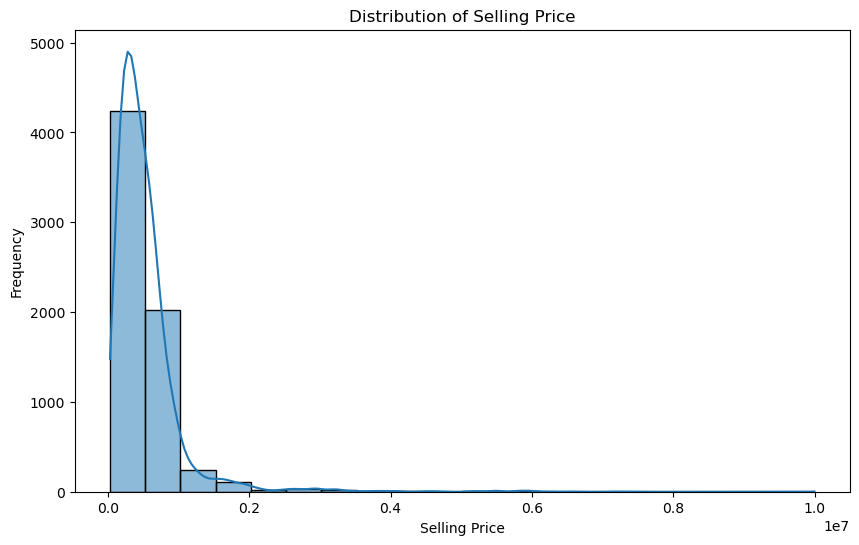

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=20)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


SCATTER PLOT OF SELLING PRICE VS KILOMETERS DRIVEN

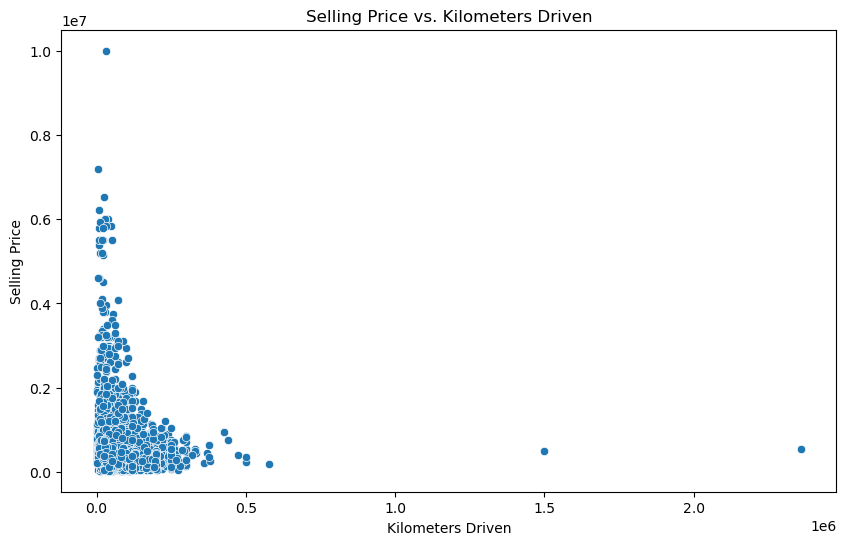

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


BOX PLOT OF SELLING PRICE BY FUEL TYPE

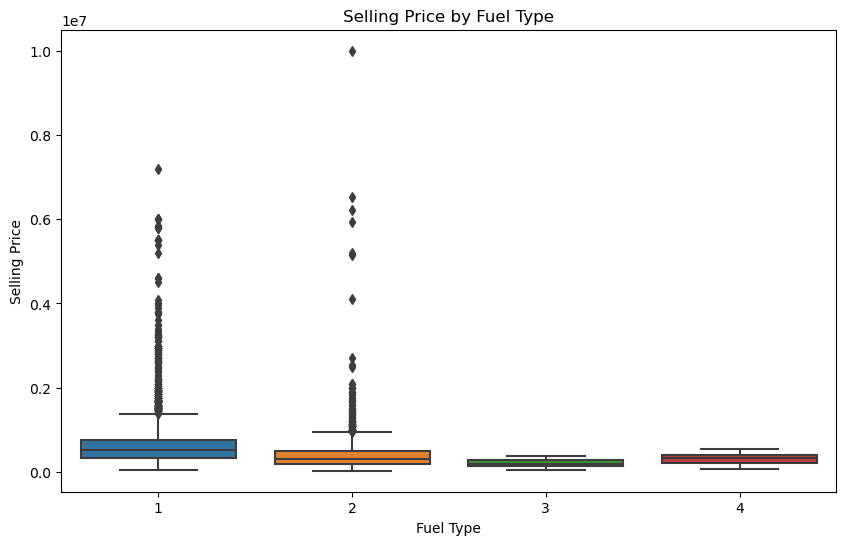

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


COUNT PLOT OF FUEL TYPES

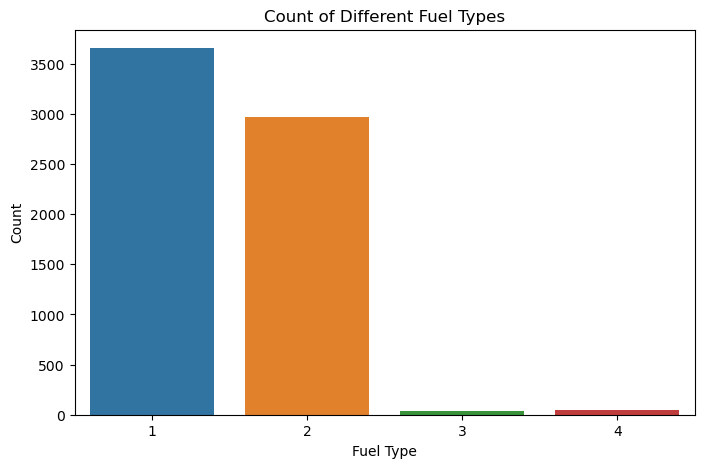

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fuel', data=df)
plt.title('Count of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


COUNT PLOT OF SELLER TYPES

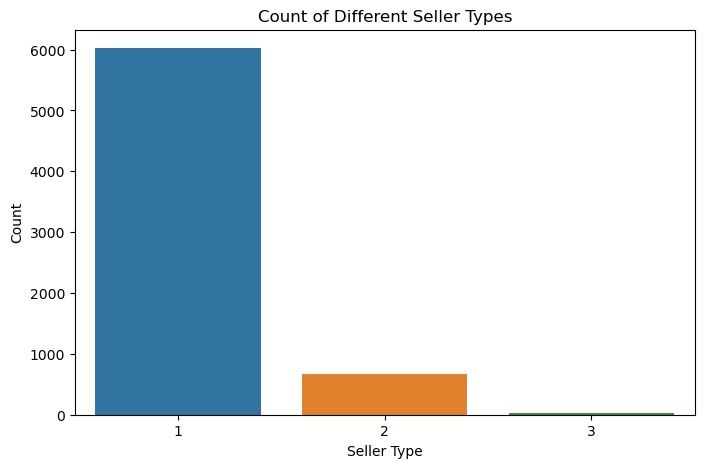

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(x='seller_type', data=df)
plt.title('Count of Different Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()


PAIR PLOT OF NUMERICAL FEATURES

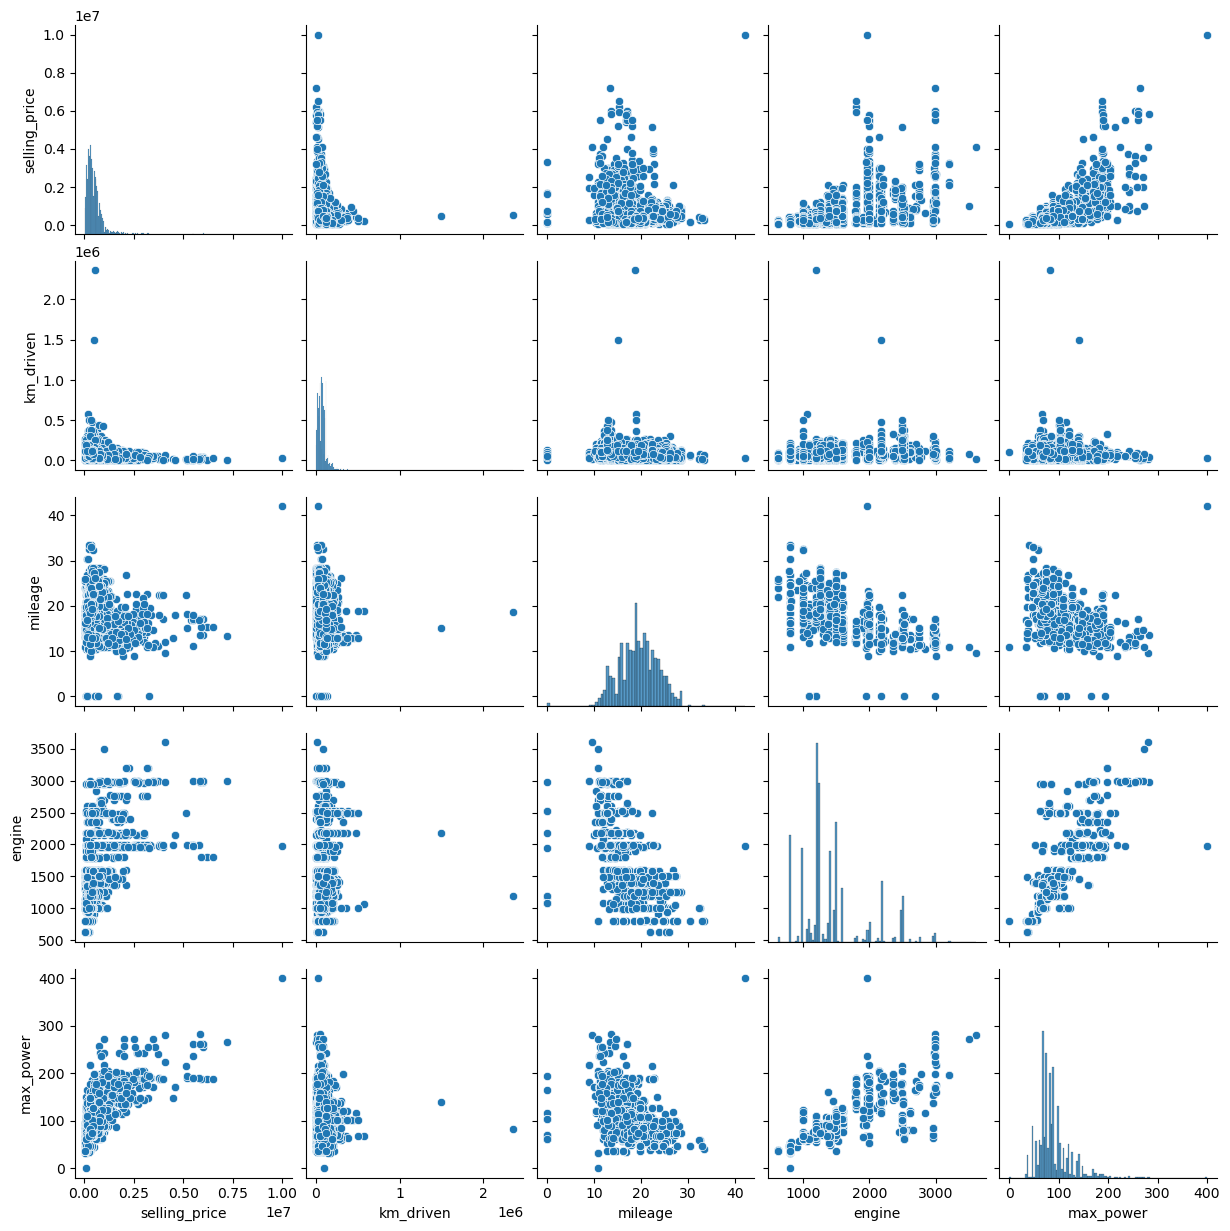

In [47]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']])
plt.show()


BAR PLOT OF AVERAGE SELLING PRICE BY FUEL TYPE

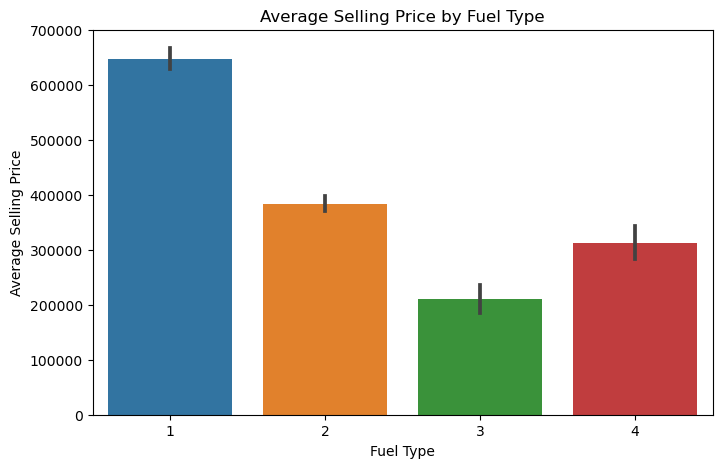

In [48]:
# Barplot of average selling price by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(x='fuel', y='selling_price', data=df)
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()


Boxplot of Selling Price by Transmission Type

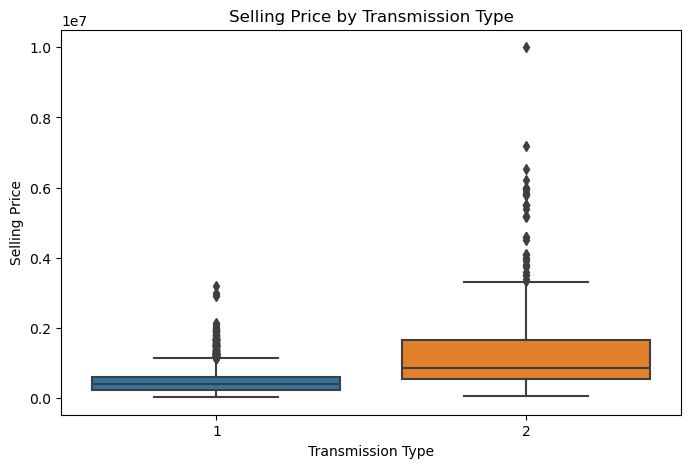

In [49]:
# Boxplot of selling price by transmission type
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()


Heatmap of Correlation Matrix

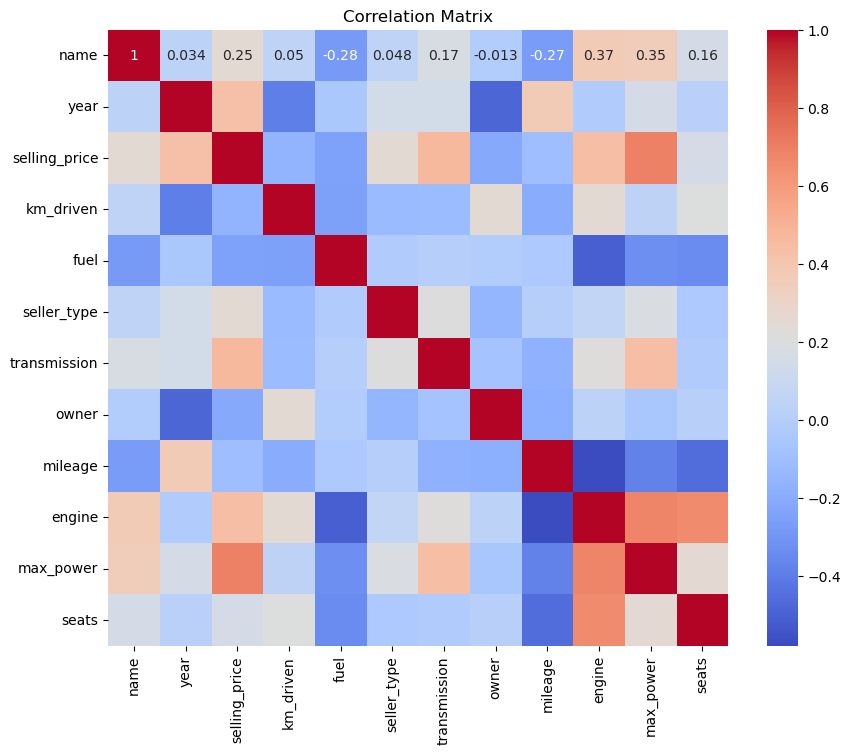

In [50]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Violin Plot of Selling Price by Owner Type

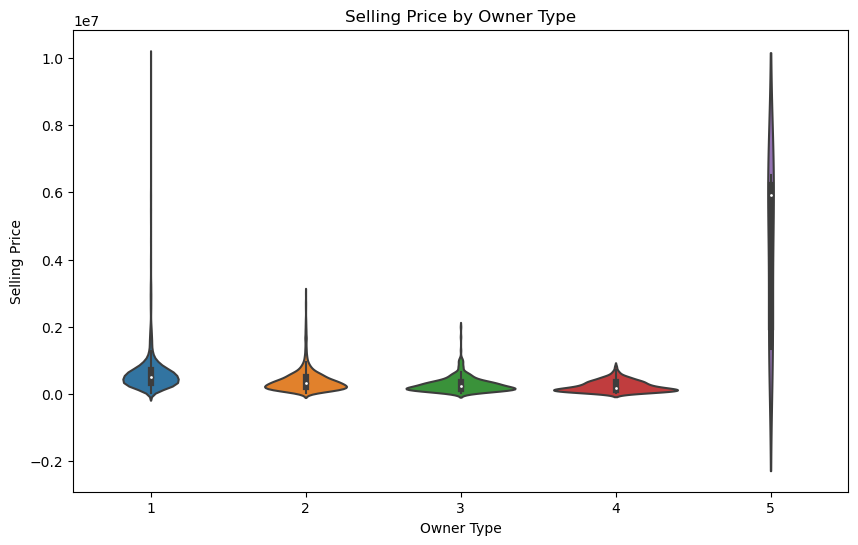

In [51]:
# Violin plot of selling price by owner type
plt.figure(figsize=(10, 6))
sns.violinplot(x='owner', y='selling_price', data=df)
plt.title('Selling Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()


SCALING/NORMALIZATION

In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample car data
data = {
    'year': [2014, 2014, 2006, 2010, 2007],
    'selling_price': [450000, 370000, 158000, 225000, 130000],
    'km_driven': [145500, 120000, 140000, 127000, 120000],
    'mileage': [23.4, 21.14, 17.7, 23.0, 16.1],
    'engine': [1248, 1498, 1497, 1396, 1298],
    'max_power': [74.0, 103.52, 78.0, 90.0, 88.2],
    'seats': [5.0, 5.0, 5.0, 5.0, 5.0]
}

df = pd.DataFrame(data)

# Selecting numerical features
numerical_features = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
numerical_data = df[numerical_features]

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(numerical_data)
df_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=numerical_features)

print("Min-Max Scaled Data:")
print(df_minmax_scaled)

# Standardization (Z-score Scaling)
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(numerical_data)
df_standard_scaled = pd.DataFrame(data_standard_scaled, columns=numerical_features)

print("\nStandardized Data:")
print(df_standard_scaled)


Min-Max Scaled Data:
    year  selling_price  km_driven   mileage  engine  max_power  seats
0  1.000       1.000000   1.000000  1.000000   0.000   0.000000    0.0
1  1.000       0.750000   0.000000  0.690411   1.000   1.000000    0.0
2  0.000       0.087500   0.784314  0.219178   0.996   0.135501    0.0
3  0.500       0.296875   0.274510  0.945205   0.592   0.542005    0.0
4  0.125       0.000000   0.000000  0.000000   0.200   0.481030    0.0

Standardized Data:
       year  selling_price  km_driven   mileage    engine  max_power  seats
0  1.127443       1.482593   1.432801  1.080636 -1.370317  -1.234292    0.0
1  1.127443       0.835878  -1.002961  0.300867  1.087210   1.624802    0.0
2 -1.246121      -0.877915   0.907441 -0.886039  1.077380  -0.846881    0.0
3 -0.059339      -0.336291  -0.334320  0.942624  0.084539   0.315353    0.0
4 -0.949425      -1.104265  -1.002961 -1.438088 -0.878812   0.141018    0.0


DATA MODEL TRAINING

In [53]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score




In [54]:
cars_data = pd.read_csv("C:\\Users\\91891\\Downloads\\Cardetails.csv")

In [55]:
# Convert 'mileage' column to string and then extract numerical value and convert to float
cars_data['mileage'] = cars_data['mileage'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


# Extract numerical value from 'engine' column and convert to float
# Check if the column contains string values before applying .str.extract
if cars_data['engine'].dtype == 'O':  # Check if the column is of object (string) type
    cars_data['engine'] = cars_data['engine'].str.extract('(\d+\.?\d*)').astype(float)

# Extract numerical value from 'max_power' column and convert to float
# Check if the column contains string values before applying .apply
if cars_data['max_power'].dtype == 'O':  # Check if the column is of object (string) type
    cars_data['max_power'] = cars_data['max_power'].apply(lambda x: float(re.findall(r'\d+\.?\d*', str(x))[0]) if re.findall(r'\d+\.?\d*', str(x)) else None)

In [56]:
# Define features and target variable
X = cars_data.drop(columns=['selling_price'])
y = cars_data['selling_price']

# Define numerical and categorical features
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']


In [57]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Define the model
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r_squared_rf= r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest -R-squared: {r_squared_rf}")

Random Forest - Mean Squared Error: 20252328391.687298
Random Forest - Root Mean Squared Error: 142310.67560688235
Random Forest -R-squared: 0.9691032660070705


In [60]:
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression_model.fit(X_train, y_train)

# Evaluate the model
y_pred_linear = linear_regression_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r_squared_linear= r2_score(y_test, y_pred_linear)
print(f"Linear Regression - Mean Squared Error: {mse_linear}")
print(f"Linear Regression - Root Mean Squared Error: {rmse_linear}")
print(f" Linear Regression -R-squared: {r_squared_linear}")

Linear Regression - Mean Squared Error: 198038765899.44788
Linear Regression - Root Mean Squared Error: 445015.46703395364
 Linear Regression -R-squared: 0.6978741924412628


Both models have relatively high MSE and RMSE, indicating a significant difference between predicted and actual values. However, Random Forest performs slightly better than Linear Regression, as it has a lower MSE and RMSE.
R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variables. Random Forest has a much higher R-squared value, indicating a better fit to the data compared to Linear Regression

Conclusion:

Based on these results, the Random Forest model appears to be more effective for predicting car data, as it achieves lower prediction errors and a higher level of explained variance compared to Linear Regression.

Validation

Model Evaluation with Cross-Validation

In [61]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation for Random Forest model
rf_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
rf_r2_scores = cross_val_score(random_forest_model, X, y, cv=5)

# Perform cross-validation for Linear Regression model
lr_scores = cross_val_score(linear_regression_model, X, y, cv=5, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
lr_r2_scores = cross_val_score(linear_regression_model, X, y, cv=5)

# Print the results
print("Random Forest CV RMSE:", rf_rmse_scores.mean(), "±", rf_rmse_scores.std())
print("Random Forest CV R-squared:", rf_r2_scores.mean(), "±", rf_r2_scores.std())
print("Linear Regression CV RMSE:", lr_rmse_scores.mean(), "±", lr_rmse_scores.std())
print("Linear Regression CV R-squared:", lr_r2_scores.mean(), "±", lr_r2_scores.std())

Random Forest CV RMSE: 150742.5258232316 ± 15327.314589715965
Random Forest CV R-squared: 0.964717328864649 ± 0.006095781131261599
Linear Regression CV RMSE: 458909.6078032884 ± 20666.180136749652
Linear Regression CV R-squared: 0.6711510644709187 ± 0.023510267399977008


Conclusion:
Random Forest Model: The cross-validated results show that the Random Forest model performs significantly better than the Linear Regression model in terms of both RMSE and R-squared. This means that the Random Forest model provides more accurate and reliable predictions for the car data.

Linear Regression Model: Although it is simpler, the Linear Regression model shows much higher RMSE and lower R-squared values, indicating poorer performance compared to the Random Forest model.

HYPER PARAMETER TUNING

In [62]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Define the parameter grid for RandomForest
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

# Define the RandomForest pipeline
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(random_forest_pipeline, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best RMSE for Random Forest:", np.sqrt(-grid_search_rf.best_score_))

# Validate the best Random Forest model using cross-validation
best_rf_model = grid_search_rf.best_estimator_
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores)
rf_cv_r2_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='r2')

print("Random Forest CV RMSE:", rf_cv_rmse.mean(), "±", rf_cv_rmse.std())
print("Random Forest CV R-squared:", rf_cv_r2_scores.mean(), "±", rf_cv_r2_scores.std())

# Perform similar process for Linear Regression for comparison
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_cv_scores = cross_val_score(linear_regression_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
lr_cv_rmse = np.sqrt(-lr_cv_scores)
lr_cv_r2_scores = cross_val_score(linear_regression_pipeline, X, y, cv=5, scoring='r2')

print("Linear Regression CV RMSE:", lr_cv_rmse.mean(), "±", lr_cv_rmse.std())
print("Linear Regression CV R-squared:", lr_cv_r2_scores.mean(), "±", lr_cv_r2_scores.std())

Best parameters for Random Forest: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best RMSE for Random Forest: 156250.89303812225
Random Forest CV RMSE: 152512.10712616667 ± 15743.438343143309
Random Forest CV R-squared: 0.9634034599704677 ± 0.006698796085413262
Linear Regression CV RMSE: 458909.6078032884 ± 20666.180136749652
Linear Regression CV R-squared: 0.6711510644709187 ± 0.023510267399977008


In [63]:
# Train the Linear Regression model on the entire dataset
linear_regression_pipeline.fit(X, y)

# Predict on test set for final evaluation (optional)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_lr = linear_regression_pipeline.predict(X_test)


In [64]:
# Calculate test set performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Random Forest Test RMSE: {rmse_rf}")
print(f"Random Forest Test R-squared: {r2_rf}")

print(f"Linear Regression Test RMSE: {rmse_lr}")
print(f"Linear Regression Test R-squared: {r2_lr}")

Random Forest Test RMSE: 143767.24870881147
Random Forest Test R-squared: 0.9684675630308768
Linear Regression Test RMSE: 442640.15155711473
Linear Regression Test R-squared: 0.7010908395483104
